In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001253317"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001253317
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,OLD LINE BANCSHARES INC
Ticker,OLBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,1.0,6.800000e+00,NaN,6.8,6.80,6.8,6.80,6.8
interest income,42.0,1.234318e+07,7.731328e+06,1616689.0,8831300.00,11434100.5,15157337.75,31027749.0
net income,42.0,2.548350e+06,2.331107e+06,-95780.0,1155867.75,1973933.0,3128234.00,10161848.0
net interest income,42.0,1.046583e+07,6.278003e+06,1145769.0,7527963.00,10468346.0,13248176.50,24886006.0
provision for loan losses,42.0,3.525474e+05,2.829032e+05,39000.0,142500.00,302965.5,453708.25,1544280.0


# Plots

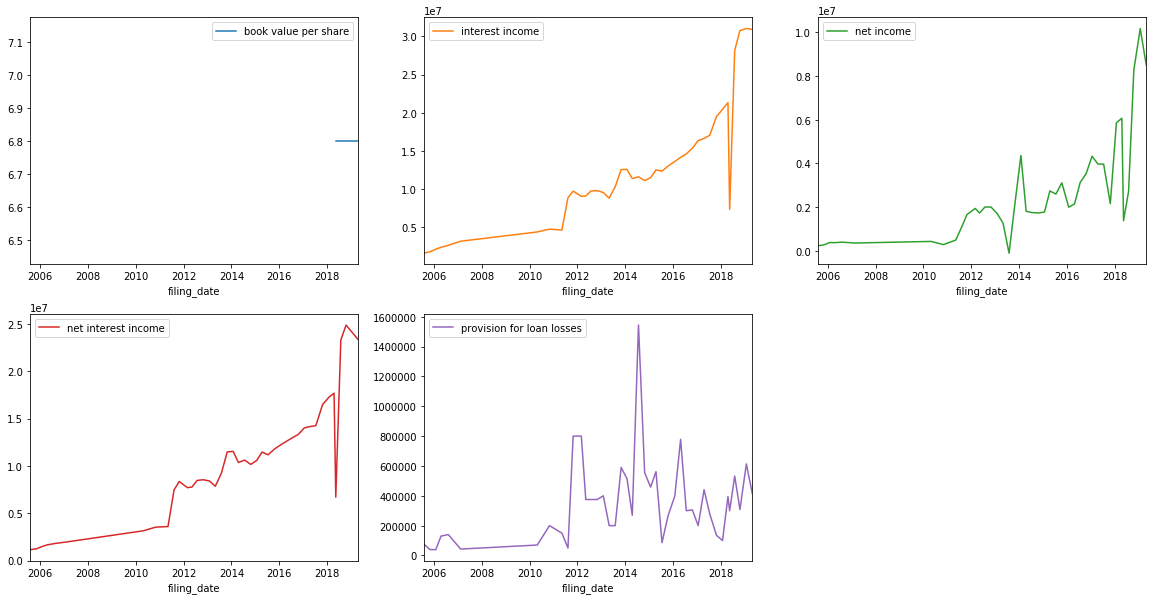

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001253317 book value per share       2005Q2 to 2017Q4: 51 periods    missing   
           book value per share        2018Q2 to 2019Q1: 4 periods    missing   
           interest income                                  2006Q3    missing   
           interest income            2007Q1 to 2009Q4: 12 periods    missing   
           interest income                                  2010Q2    missing   
           interest income                                  2010Q4    missing   
           interest income                                  2018Q1  duplicate   
           net income                                       2006Q3    missing   
           net income                 2007Q1 to 2009Q4: 12 periods    missing   
           net income                                       2010Q2    missing   
           net income                                       2010Q4    missing   
           net income                                       2018Q1  duplicate   
           net interest income                              2006Q3    missing   
           net interest income        2007Q1 to 2009Q4: 12 periods    missing   
           net interest income                              2010Q2    missing   
           net interest income                              2010Q4    missing   
           net interest income                              2018Q1  duplicate   
           provision for loan losses                        2006Q3    missing   
           provision for loan losses  2007Q1 to 2009Q4: 12 periods    missing   
           provision for loan losses                        2010Q2    missing   
           provision for loan losses                        2010Q4    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001253317 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()